# Boosting

Boosting is most commonly applied to decision trees.

The idea is to train a sequence of weak learners, where each learner tries to correct the mistakes of its predecessor. The most popular boosting methods are AdaBoost, Gradient Boosting, and XGBoost.

A *weak learner* is a model that is too simple to make accurate predictions on its own.

## Theory

The overall boosted model is the sum of T number of models.

$$F_T(x) = \sum_{t=1}^{T} f_t(x)$$

Implies that a combination of estimators with an applied coefficient could act as an ensemble estimator.

$$f_t(x) = \alpha_t h(x)$$

## AdaBoost (Adaptive Boosting)

AdaBoost works by using an ensemble of weak learner and then combining them  through the use of a weighted sum to create a strong learner. The weights are updated at each iteration to give more importance to the misclassified samples.

The weakest decision tree is a stump, which is a decision tree with a depth of 1: one node and two leaves.

Unlike a single decision tree which fits to all the data at once (aka *fitting hard*), AdaBoost aggregates multiple weak learners allowing the overall ensemble model to learn slowly from the features.

It is possible to overfit the data with AdaBoost, so it is important to tune the hyperparameters to avoid this.

## AdaBoost with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

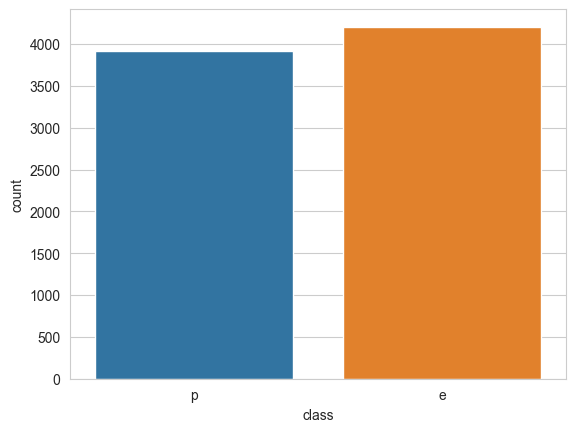

In [4]:
sns.countplot(data=df, x='class', hue='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

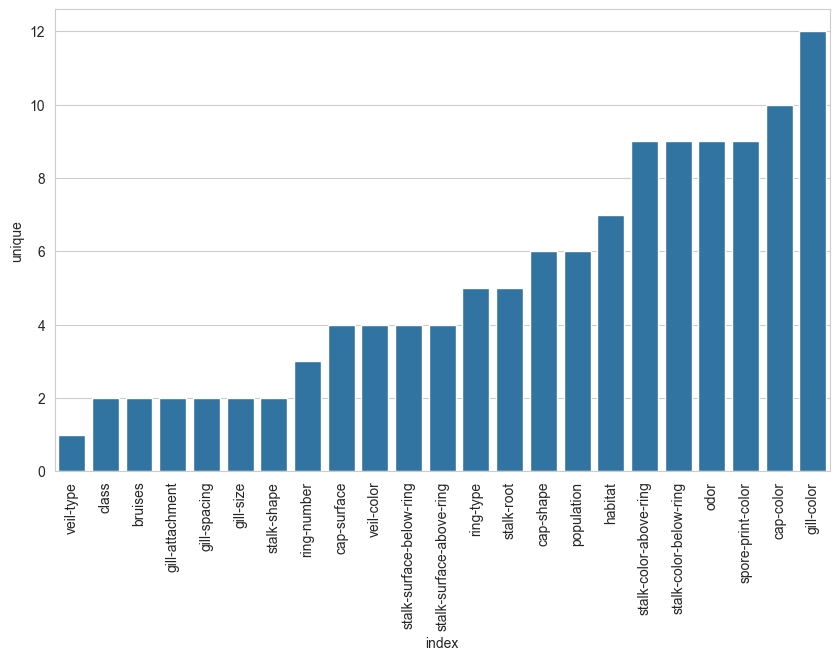

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_features, x='index', y='unique')
plt.xticks(rotation=90)
plt.show()

In [9]:
X = df.drop('class', axis=1)

In [10]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
X = pd.get_dummies(X, drop_first=True)

In [12]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [13]:
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

Setting `n_estimators=1`, creates a stump: AdaBoost will try to figure out the single feature with the best performance.

In [16]:
stump_model = AdaBoostClassifier(n_estimators=1)

In [17]:
stump_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [19]:
predictions = stump_model.predict(X_test)

In [20]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], shape=(1219,), dtype=object)

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



Because of the stump model, a single feature will be a 1 when checking `feature_importances_`:

In [22]:
stump_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

To identify which feature is the most important, `argmax()` can be used, and it will return the index:

In [23]:
stump_model.feature_importances_.argmax()

np.int64(22)

In [24]:
X.columns[22]

'odor_n'

The above step can be done in one line, if there's no need to know the column index:

In [25]:
X.columns[stump_model.feature_importances_.argmax()]

'odor_n'

For the purpose of this model, the educated guess is that a mushroom without any odor is edible (not in real life!)

<Axes: xlabel='odor', ylabel='count'>

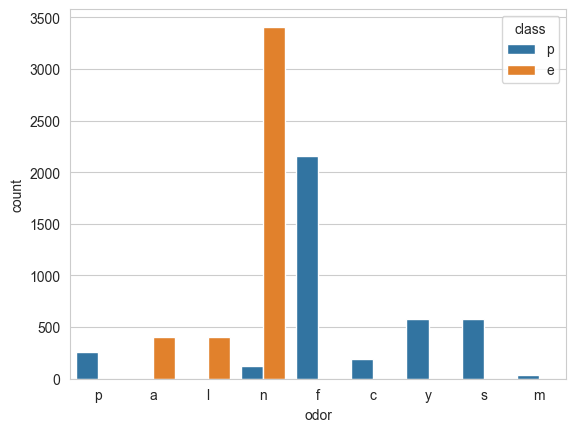

In [26]:
sns.countplot(data=df, x='odor', hue='class')

Adding more weak learners by checking the number of columns first:

In [27]:
len(X.columns)

95

And then looping through the range of columns to check the error rate (it will take a bit to run):

In [28]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

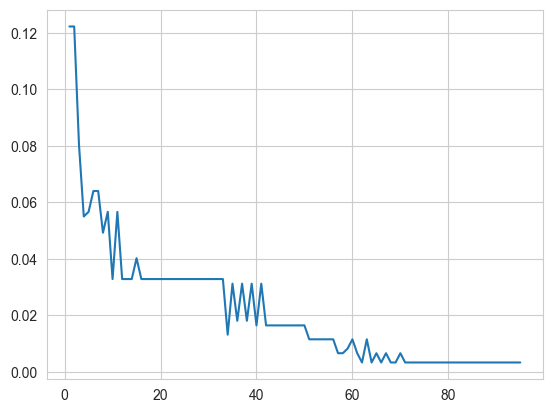

In [29]:
plt.plot(range(1,96), error_rates)

In [30]:
model

AdaBoostClassifier(n_estimators=95)

In [31]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [32]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [33]:
imp_feats = feats[feats['Importance'] > 0]
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


In [34]:
imp_feats = imp_feats.sort_values("Importance")

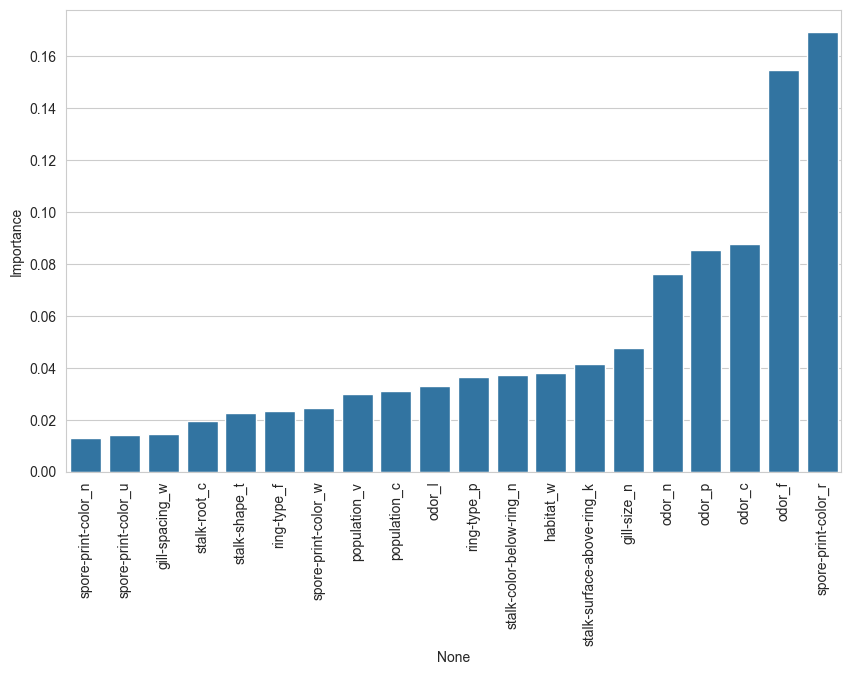

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='spore-print-color', ylabel='count'>

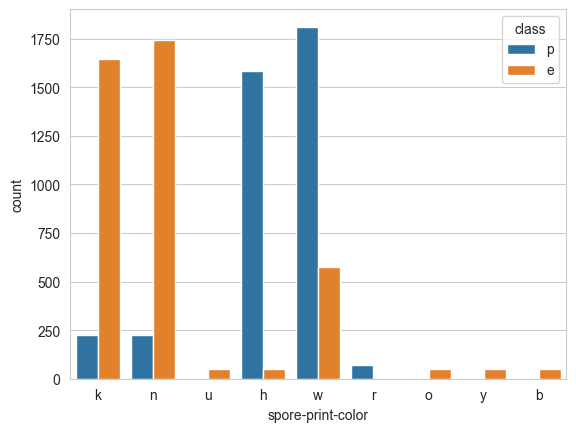

In [36]:
sns.countplot(data=df,x='spore-print-color',hue='class')

## Gradient Boosting

Gradient boost is a similar idea to AdaBoost, but the weights are updated based on the residual errors of the model.

Gradient boosting allows for larger trees to be built. The trees are built sequentially, and each tree tries to correct the errors of the previous tree.

The learning rate is a hyperparameter that determines how much each tree will correct the errors of the previous tree, the learning rate is the same for all trees (unlike AdaBoost's alpha coefficient).

Gradient boost is more robust to overfitting than AdaBoost, but it is more computationally expensive.

### Gradient Boosting with Python

In [37]:
df = pd.read_csv('./data/mushrooms.csv')

In [38]:
X= df.drop('class', axis=1)

In [39]:
X = pd.get_dummies(X, drop_first=True)

In [40]:
y = df['class']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {"n_estimators": [50,100],
              "learning_rate": [0.1,0.05,0.2],
                "max_depth": [3,4,5]}

In [45]:
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)

In [46]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [47]:
predictions = grid.predict(X_test)

In [48]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], shape=(1219,), dtype=object)

In [49]:
grid.best_estimator_

GradientBoostingClassifier()

In [50]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [52]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.20556138e-16, 0.00000000e+00, 0.00000000e+00,
       6.09555451e-17, 1.04902579e-03, 0.00000000e+00, 1.27734798e-06,
       0.00000000e+00, 0.00000000e+00, 3.63630975e-17, 0.00000000e+00,
       4.50656726e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.31053911e-03, 5.19790869e-02, 6.24175887e-04, 1.03632256e-02,
       1.82499853e-02, 2.16430869e-03, 6.14744469e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 5.63072032e-18, 1.25278108e-02,
       1.07157694e-02, 0.00000000e+00, 9.96095293e-17, 0.00000000e+00,
       1.64914005e-17, 0.00000000e+00, 0.00000000e+00, 2.84136063e-17,
       4.98693741e-17, 0.00000000e+00, 3.32991081e-17, 0.00000000e+00,
       4.13835786e-04, 2.92091629e-04, 1.35972972e-01, 4.69032068e-03,
       3.31070641e-02, 4.47043435e-04, 1.43714286e-03, 4.95063766e-06,
       1.83319493e-05, 0.00000000e+00, 3.31609524e-02, 4.39193697e-05,
       0.00000000e+00, 0.00000000e+00, 1.57791758e-03, 0.00000000e+00,
      

In [53]:
feat_import = grid.best_estimator_.feature_importances_

In [54]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [55]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,3.205561e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,6.095555e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.173701e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [56]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135973
bruises_t,0.051979
stalk-surface-below-ring_y,0.033161
stalk-root_r,0.033107
...,...
spore-print-color_y,0.000000
population_n,0.000000
habitat_l,0.000000
habitat_p,0.000000


In [57]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.06463,0.0,0.0,3.260997e-08,0.000929,0.614744


In [58]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]
imp_feats = imp_feats.sort_values('Importance')
imp_feats

,Importance
odor_c,0.000624
ring-number_o,0.000898
ring-type_p,0.000960
cap-surface_g,0.001049
spore-print-color_w,0.001302
stalk-surface-above-ring_s,0.001437
stalk-color-above-ring_n,0.001578
odor_m,0.002164
cap-color_y,0.002311
stalk-color-above-ring_w,0.002553


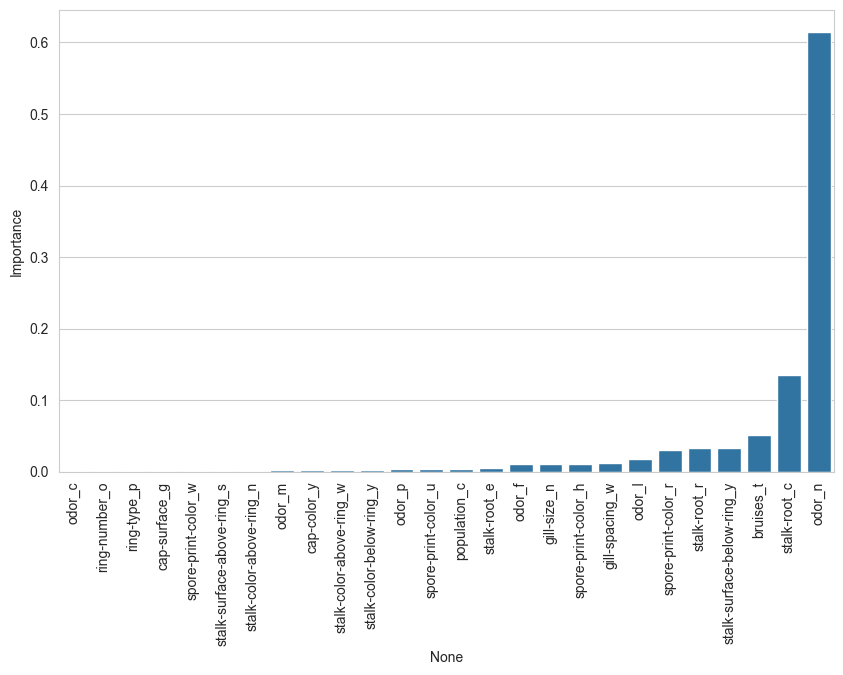

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

## XGBoost

XGBoost is another library (`xbgboost`) which supports GPU acceleration with CUDA-enabled GPUs.

In [92]:
import xgboost as xgb

In [93]:
df = pd.read_csv('./data/mushrooms.csv')

In [94]:
dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

In [105]:
# param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}

params = {
  "colsample_bynode": 0.8,
  "learning_rate": 1,
  "max_depth": 5,
  "num_parallel_tree": 100,
  "objective": "binary:logistic",
  "subsample": 0.8,
  "tree_method": "hist",
  "device": "cuda",
}

In [106]:
model = xgb.train(params, dtrain)

In [107]:
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [108]:
predictions = model.predict(dtest)

In [109]:
predictions

array([9.9961132e-01, 1.9071678e-04, 9.9973971e-01, ..., 9.9961144e-01,
       9.9957019e-01, 5.3263465e-03], shape=(1219,), dtype=float32)

In [110]:
predictions = [1 if x > 0.5 else 0 for x in predictions]

In [111]:
predictions

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [113]:
model.feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [114]:
model.get_score()

{'cap-shape': 106.0,
 'cap-surface': 321.0,
 'cap-color': 235.0,
 'bruises': 140.0,
 'odor': 1515.0,
 'gill-attachment': 4.0,
 'gill-spacing': 347.0,
 'gill-size': 640.0,
 'gill-color': 428.0,
 'stalk-shape': 235.0,
 'stalk-root': 516.0,
 'stalk-surface-above-ring': 239.0,
 'stalk-surface-below-ring': 407.0,
 'stalk-color-above-ring': 109.0,
 'stalk-color-below-ring': 188.0,
 'veil-color': 1.0,
 'ring-number': 224.0,
 'ring-type': 57.0,
 'spore-print-color': 1471.0,
 'population': 581.0,
 'habitat': 460.0}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

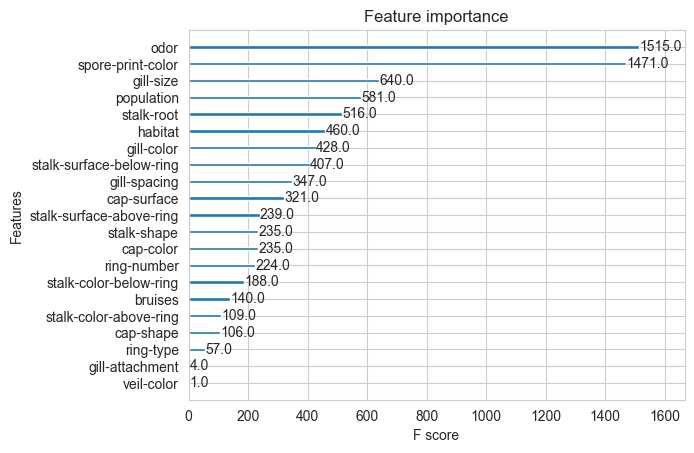

In [115]:
xgb.plot_importance(model)